In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model

## Recopilación de Datos de Accidentes de Tránsito, del 2015 al 2018

# **3.) Descripción de los datos y su limpieza**

Los datos de importaciones de vehículos ubicados en el portal de la SAT, proporcionan varios sets de datos de los vehículos entrantes a Guatemala de 2011 a 2020. Se observó que estos datos no requerían de una limpieza extensiva, debido a que no se presentaban datos con espacios vacíos o datos mezcaldos.

Tambien tenemos los datasets de los datos de hechos de
tránsito, fallecidos y lesionados que tiene el Instituto Nacional de Estadística. Estos en particular no requirieron de mayor limpieza. Los data sets que tenían como principal diferenciador el sexo, contaban con una columna de casos ignorados, los cuales requerían limpieza. Esto porque los mismos poseian "-" en lugar de 0, lo cual podría dar problemas. Luego se necesitó de eliminar las primeras 2 filas, con el títulos respectivo de cada dataset, porque estas líneas no permitían visualizar el header de los datasets.

Además de esto, también se cuenta con los datos de hechos de tránsito, fallecidos y lesionados proveídos por el Instituto Nacional de Estadística. En términos de limpieza, el procesamiento fue mínimo, debido a que se eliminaron tuplas que no aportaban datos significativos al estudio (como colores ignorados, o edad ignorada). Sin embargo, se realizaron algunas operaciones para legibilidad de datos, como indicar el color del carro en vez del número.

las operaciones hechas fueron:
- Esta fue para poder reemplazar en esos 2 datasets los valores de "-" por 0

```
dataNFPS.Ignorado = dataNFPS.Ignorado.replace({"-": 0})
dataNLPS.Ignorado = dataNLPS.Ignorado.replace({"-": 0})
```



- luego para eliminar en todos los datasets las primeras 2 filas se tuvo que hacer de manera manual.

- al final fueron guardados para poder utilizarlos sin requerir volver ha hacerles limpieza a todos

originalmente casi ninguno requirió de una alta eliminación de filas o grandes cambios, pero si se requirieron hacer los anteriormente mencionados. Así no causaría problemas a la hora de trabajar con cada columna, por algún dato que no sea del mismo tipo o alguna celda vacía.

Se cargaron los respectivos archivos y se unieron en un sólo DataFrame.

In [2]:
dataAcc_2015 = pd.read_excel('./accidentes/hechos2015.xlsx')
dataAcc_2016 = pd.read_excel('./accidentes/hechos2016.xlsx')
dataAcc_2017 = pd.read_excel('./accidentes/hechos2017.xlsx')
dataAcc_2018 = pd.read_excel('./accidentes/hechos2018.xlsx')
dataAcc_Total = dataAcc_2015.append(dataAcc_2016, sort=False)
dataAcc_Total = dataAcc_Total.append(dataAcc_2017, sort=False)
dataAcc_Total = dataAcc_Total.append(dataAcc_2018, sort=False)

In [3]:
dataAcc_Total.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,...,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2015,1,1,4,16,3,2,1,101,...,2.0,2.0,4.0,9.0,4,21,5,2011,5,1
1,2,2015,1,1,4,22,4,3,1,101,...,5.0,5.0,7.0,1.0,4,21,5,9999,6,1
2,3,2015,1,1,4,2,1,1,1,101,...,16.0,12.0,18.0,9.0,3,44,6,9999,6,1
3,4,2015,1,1,4,9,2,1,1,101,...,3.0,3.0,5.0,9.0,4,40,5,9999,6,2
4,5,2015,1,1,4,1,1,1,1,115,...,3.0,3.0,5.0,9.0,1,34,4,9999,6,2


Reemplazo de color de vehículo de código númerico a valor legible.

In [4]:
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 1, 'color_veh'] = 'Rojo'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 2, 'color_veh']  = 'Blanco'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 3, 'color_veh']  = 'Azul'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 4, 'color_veh']  = 'Gris'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 5, 'color_veh'] = 'Negro'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 6, 'color_veh'] = 'Blanco'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 7, 'color_veh']  = 'Amarillo'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 8, 'color_veh']  = 'Celeste'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 9, 'color_veh']  = 'Corinto'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 10, 'color_veh']  = 'Café'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 11, 'color_veh']  = 'Beige'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 12, 'color_veh']  = 'Turquesa'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 13, 'color_veh']  = 'Marfil'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 14, 'color_veh'] = 'Anaranjado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 15, 'color_veh']  = 'Morado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 16, 'color_veh']  = 'Rosado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 17, 'color_veh']  = 'Varios'

Reemplazo de mes de código númerico a valor legible.

In [5]:
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 1, 'mes_ocu'] = 'Enero'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 2, 'mes_ocu']  = 'Febrero'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 3, 'mes_ocu']  = 'Marzo'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 4, 'mes_ocu']  = 'Abril'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 5, 'mes_ocu'] = 'Mayo'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 6, 'mes_ocu'] = 'Junio'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 7, 'mes_ocu']  = 'Julio'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 8, 'mes_ocu']  = 'Agosto'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 9, 'mes_ocu']  = 'Septiembre'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 10, 'mes_ocu']  = 'Octubre'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 11, 'mes_ocu']  = 'Noviembre'
dataAcc_Total.loc[dataAcc_Total['mes_ocu'] == 12, 'mes_ocu']  = 'Diciembre'

In [29]:
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 1, 'día_sem_ocu'] = 'Lunes'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 2, 'día_sem_ocu']  = 'Martes'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 3, 'día_sem_ocu']  = 'Miercoles'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 4, 'día_sem_ocu']  = 'Jueves'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 5, 'día_sem_ocu'] = 'Viernes'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 6, 'día_sem_ocu'] = 'Sabado'
dataAcc_Total.loc[dataAcc_Total['día_sem_ocu'] == 7, 'día_sem_ocu']  = 'Domingo'
dataAcc_Total.loc[dataAcc_Total['sexo_per'] == 1, 'sexo_per'] = 'Hombre'
dataAcc_Total.loc[dataAcc_Total['sexo_per'] == 2, 'sexo_per']  = 'Mujer'


## Eliminación de datos con color "99" y edades con 999

In [6]:
indexNull = dataAcc_Total[dataAcc_Total['color_veh'] == 99].index

In [7]:
dataAcc_Total.drop(indexNull, inplace=True)

In [8]:
indexNull = dataAcc_Total[dataAcc_Total['edad_per'] == 999].index

In [9]:
dataAcc_Total.drop(indexNull, inplace=True)

In [10]:
dataAcc_Total = dataAcc_Total.where(dataAcc_Total['tipo_veh'] == 4)

In [11]:
dataAcc_Total = dataAcc_Total[dataAcc_Total['tipo_veh'].notna()]

In [12]:
dataAcc_Total

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,...,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1.0,2015.0,Enero,1.0,4.0,16.0,3.0,2.0,1.0,101.0,...,2.0,2.0,4.0,9.0,4.0,21.0,Negro,2011.0,5.0,1.0
1,2.0,2015.0,Enero,1.0,4.0,22.0,4.0,3.0,1.0,101.0,...,5.0,5.0,7.0,1.0,4.0,21.0,Negro,9999.0,6.0,1.0
3,4.0,2015.0,Enero,1.0,4.0,9.0,2.0,1.0,1.0,101.0,...,3.0,3.0,5.0,9.0,4.0,40.0,Negro,9999.0,6.0,2.0
5,6.0,2015.0,Enero,1.0,4.0,8.0,2.0,1.0,1.0,114.0,...,2.0,2.0,4.0,1.0,4.0,41.0,Gris,9999.0,6.0,3.0
12,13.0,2015.0,Enero,2.0,5.0,10.0,2.0,1.0,1.0,101.0,...,3.0,3.0,5.0,9.0,4.0,49.0,Azul,9999.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,6247.0,2018.0,Diciembre,14.0,5.0,20.0,4.0,3.0,1.0,101.0,...,NaN,NaN,NaN,NaN,4.0,18.0,Negro,2018.0,5.0,5.0
6247,6248.0,2018.0,Diciembre,14.0,5.0,20.0,4.0,3.0,1.0,115.0,...,NaN,NaN,NaN,NaN,4.0,32.0,Negro,9999.0,99.0,5.0
6257,6258.0,2018.0,Diciembre,15.0,6.0,15.0,3.0,2.0,1.0,101.0,...,NaN,NaN,NaN,NaN,4.0,6.0,Rojo,2012.0,5.0,5.0
6271,6272.0,2018.0,Diciembre,15.0,6.0,21.0,4.0,3.0,11.0,1102.0,...,NaN,NaN,NaN,NaN,4.0,27.0,Blanco,9999.0,99.0,5.0


In [13]:
dataAcc_Total.count()

núm_corre            2098
año_ocu              2098
mes_ocu              2098
día_ocu              2098
día_sem_ocu          2098
hora_ocu             2098
g_hora               2098
g_hora_5             2098
depto_ocu            2098
mupio_ocu            2098
área_geo_ocu         1252
zona_ocu             2098
sexo_per              646
edad_per              646
mayor_menor           646
g_edad_80ymás         646
g_edad_60ymás         646
edad_quinquenales     646
estado_con            646
tipo_veh             2098
marca_veh            2098
color_veh            2098
modelo_veh           2098
g_modelo_veh         2098
tipo_eve             2098
dtype: int64

## Exploracion de datos

### Descripción de los datos

*   **color_veh** - Variable de tipo categórica. Indica el color del vehículo, es una variable indispensable a tomar en cuenta en el estudio.
*   **marca_veh** - Variable de tipo categórica. Indica la marca del vehículo, en número. Los datos actuales no indican la marca, debido a que en el diccionario de hechos, el único número con referencia a marca es el "99", indicando marca ignorada. Es una variable céntrica en el estudio realizado, sin embargo, por la poca información aportada por el diccionario de hechos, no aporta significativamente al estudio. 
* En total, este dataset cuenta con 25 variables y 27092 filas o ejemplos.


### Resumen de variables

#### Color de carro

/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


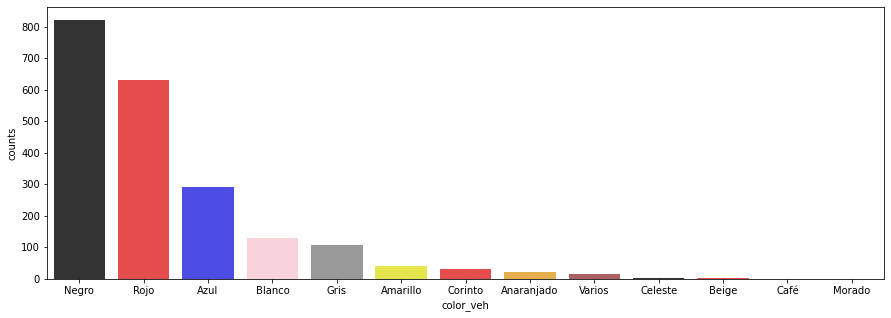

In [14]:
s = dataAcc_Total.groupby('color_veh').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.color_veh, s.counts, alpha=0.8, ax=ax,palette=("black","red","blue","pink","gray","yellow","red","orange","brown"))

In [15]:
dataAcc_Total.groupby('color_veh').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(3)

,color_veh,counts
10,Negro,821
11,Rojo,631
2,Azul,293


#### Cantidad de accidentes por año

/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


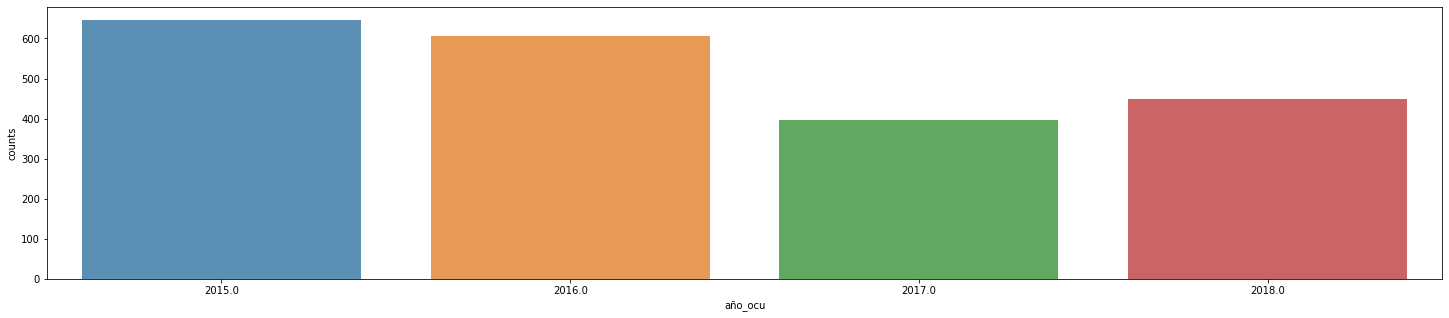

In [16]:
s = dataAcc_Total.groupby('año_ocu').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.año_ocu, s.counts, alpha=0.8, ax=ax)

In [17]:
dataAcc_Total.groupby('año_ocu').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,año_ocu,counts
0,2015.0,646
1,2016.0,606
3,2018.0,450
2,2017.0,396


/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


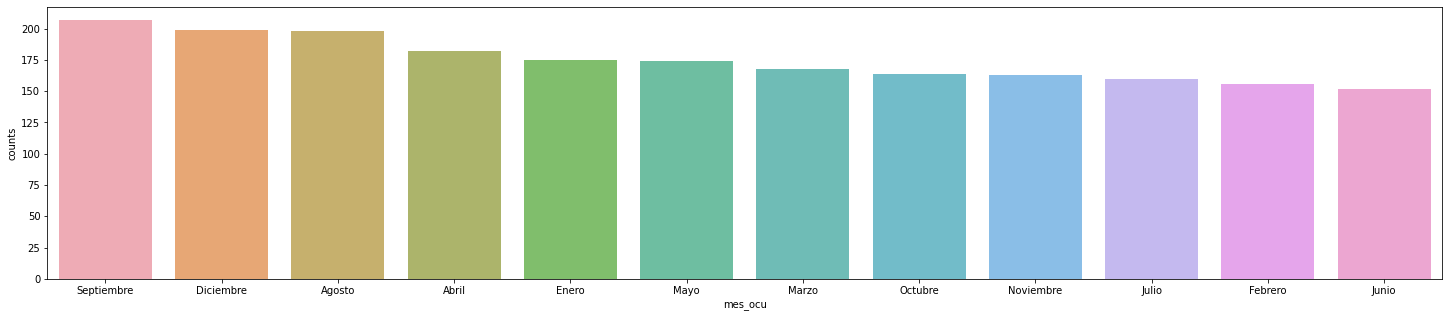

In [18]:
s = dataAcc_Total.groupby('mes_ocu').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.mes_ocu, s.counts, alpha=0.8, ax=ax)

In [19]:
dataAcc_Total.groupby('mes_ocu').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,mes_ocu,counts
11,Septiembre,207
2,Diciembre,199
1,Agosto,198
0,Abril,182
3,Enero,175
8,Mayo,174
7,Marzo,168
10,Octubre,164
9,Noviembre,163
5,Julio,160


/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


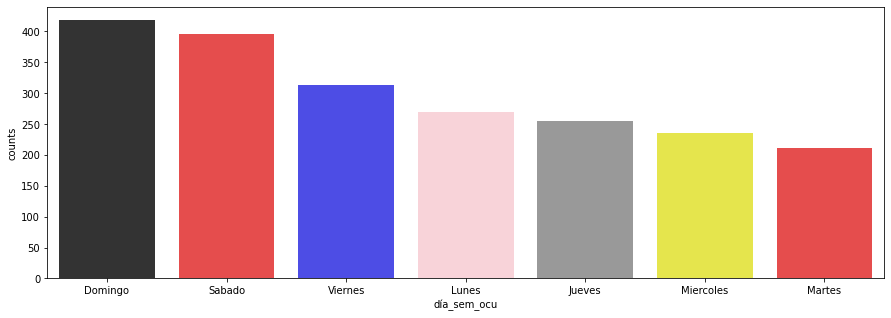

In [26]:
s = dataAcc_Total.groupby('día_sem_ocu').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.día_sem_ocu, s.counts, alpha=0.8, ax=ax,palette=("black","red","blue","pink","gray","yellow","red","orange","brown"))

In [27]:
dataAcc_Total.groupby('día_sem_ocu').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,día_sem_ocu,counts
0,Domingo,419
5,Sabado,395
6,Viernes,313
2,Lunes,270
1,Jueves,255
4,Miercoles,235
3,Martes,211


/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


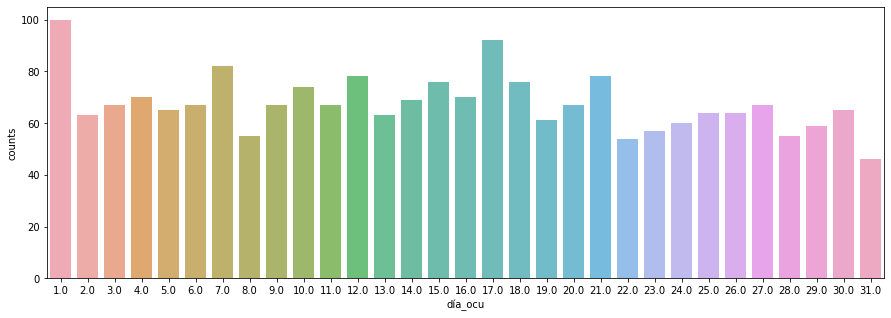

In [41]:
s = dataAcc_Total.groupby('día_ocu').size().reset_index(name='counts')
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.día_ocu, s.counts, alpha=0.8, ax=ax)

In [40]:
dataAcc_Total.groupby('día_ocu').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)

,día_ocu,counts
0,1.0,100
16,17.0,92
6,7.0,82
20,21.0,78
11,12.0,78


/home/gustavo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


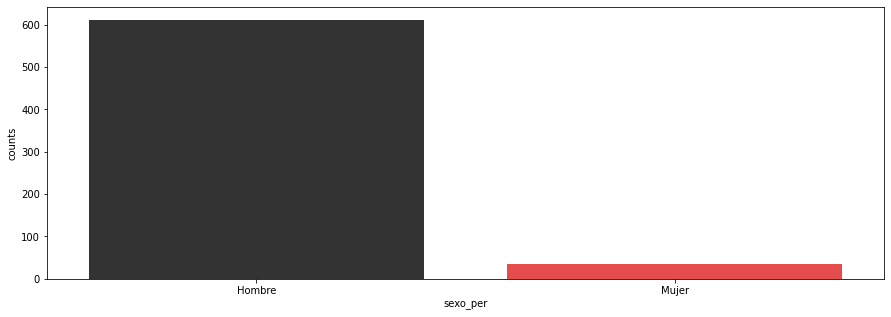

In [31]:
s = dataAcc_Total.groupby('sexo_per').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.sexo_per, s.counts, alpha=0.8, ax=ax,palette=("black","red"))

In [32]:
dataAcc_Total.groupby('sexo_per').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,sexo_per,counts
0,Hombre,611
1,Mujer,35


# PALETA DE COLORES ESCOGIDA

https://coolors.co/003049-d62828-f77f00-fcbf49-eae2b7

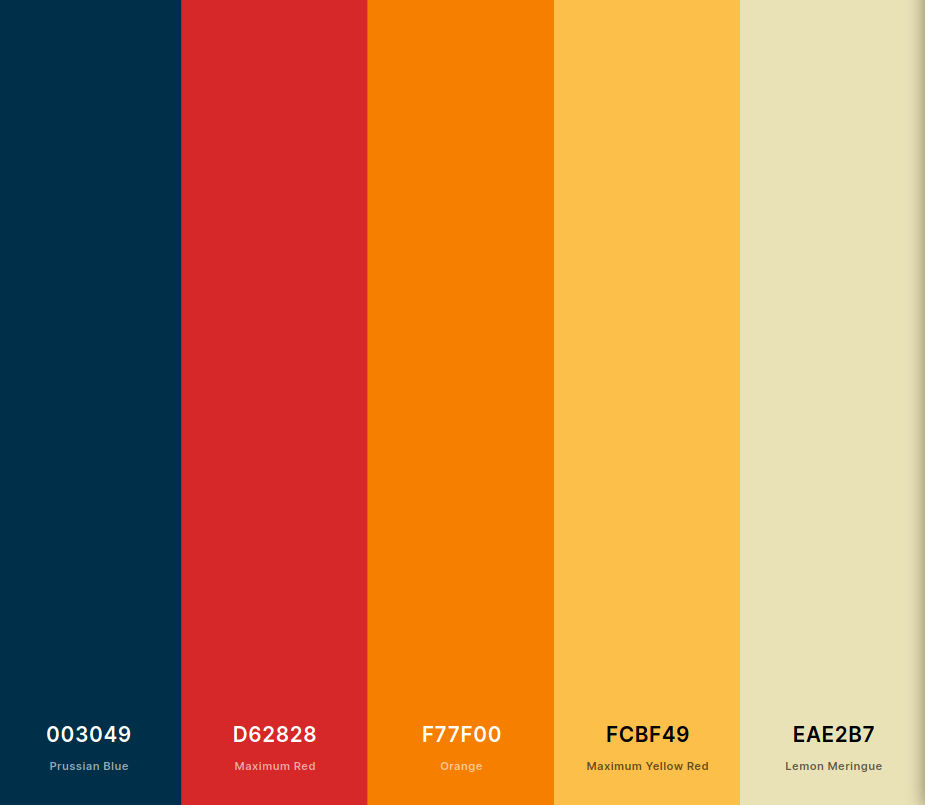

In [21]:
from IPython.display import Image
Image("./paleta.png")

Se eligio esta paleta de colores debido a que los colores fuertes como rojo y naranja para remarcar datos importantes de los accidentes.

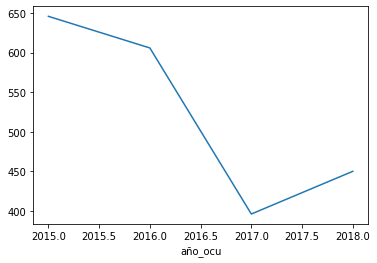

In [22]:
acc_by_year = dataAcc_Total.groupby('año_ocu')
acc_by_year['año_ocu'].count().plot()

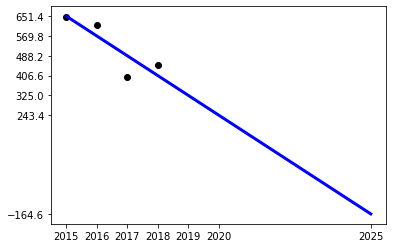

In [23]:
x = [2015, 2016, 2017, 2018]
y = [650, 616, 400, 450]

x = np.array(x).reshape(4, 1)
y = np.array(y).reshape(4, 1)

reg = linear_model.LinearRegression()
reg.fit(x, y)

years = [2015, 2016, 2017, 2018, 2019, 2020, 2025]
x_pred = np.array(years).reshape(len(years), 1)
y_pred = reg.predict(x_pred)

plt.scatter(x, y,  color='black')
plt.plot(x_pred, y_pred, color='blue', linewidth=3)
plt.xticks((years))
plt.yticks((y_pred))
plt.show()